# Single Perceptron Neural Networks for Linear Regression

![](https://raw.githubusercontent.com/Ryota-Kawamura/Mathematics-for-Machine-Learning-and-Data-Science-Specialization/1a5a79553a3e2b26a0acdcd408965793b947e347/Course-1/Week-3/images/nn_model_linear_regression_simple.png)

**행렬 내적연산(Matrix Inner Product)** 응용하여 **단일 퍼셉트론(Single Perceptron)** 으로 구성된 여러분의 첫 번째 신경망을 구축

### 학습 목표

- **단순 선형 회귀(Simple Linear Regression)** 를 위해 하나의 입력 노드(input node)와 단일 퍼셉트론을 가진 신경망 구현

- 행렬 내적연산을 사용하여 순전파(Forward Propagation) 구현하기

- **다중 선형 회귀(Multiple Linear Regression)** 를 위해 두 개의 입력 노드와 단일 퍼셉트론을 가진 신경망 구현

파라미터 업데이트를 포함한 역전파(Backward Propagation) 과정은 미적분학(Calculus)에 대한 이해가 필요하나 이 코드에서 역전파 및 파라미터 업데이트 함수는 내부적으로 처리되어 보이지 않게 설정

# Table of Contents

- [ 1 - Simple Linear Regression](#1)
  - [ 1.1 - Simple Linear Regression Model](#1.1)
  - [ 1.2 - Neural Network Model with a Single Perceptron and One Input Node](#1.2)

- [ 2 - Implementation of the Neural Network Model for Linear Regression](#2)

- [ 3 - Multiple Linear Regression](#3)
  - [ 3.1 - Multipe Linear Regression Model](#3.1)
  - [ 3.2 - Neural Network Model with a Single Perceptron and Two Input Nodes](#3.2)
  - [ 3.3 - Dataset](#3.3)
  - [ 3.4 - Performance of the Neural Network Model for Multiple Linear Regression](#3.4)
    - [ Exercise 6](#ex06)

## Packages

Let's first import all the packages that you will need during this assignment.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# A function to create a dataset.
from sklearn.datasets import make_regression
import pandas as pd
# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline

# Set a seed so that the results are consistent.
np.random.seed(3)

<a name='1'></a>
## **단순 선형 회귀 (Simple Linear Regression)**

**선형 회귀(Linear regression)** : 실수형 반응 변수(종속 변수)와 하나 이상의 설명 변수(독립 변수) 간의 관계를 모델링하기 위한 선형적 접근 방식

- 독립 변수가 하나인 경우를 **단순 선형 회귀(simple linear regression)**
- 하나보다 많은 경우를 **다중 선형 회귀(multiple linear regression)**

<a name='1.1'></a>

### 1.1 - 단순 선형 회귀 모델 (Simple Linear Regression Model)

- 단순 선형 회귀 모델은 다음과 같이 표현

$$\hat{y} = wx + b,\tag{1}$$

>> $\hat{y}$는 기울기 $w$와 절편 $b$를 갖는 직선 방정식을 사용하여, 독립 변수 $x$를 기반으로 구한 종속 변수 $y$의 예측값

>> 훈련 데이터 포인트들의 집합 $(x_1, y_1)$, ..., $(x_m, y_m)$이 주어졌을 때, 목표는 원래 값 $y_i$와 예측값 $\hat{y}_i = wx_i + b$ 사이의 차이가 최소가 되는 파라미터 $w$와 $b$,

>> 즉 "가장" 잘 맞는(best fitting) 직선을 찾는 것으로 이를 수행하기 위해 간단한 신경망 모델을 사용하며 이 모델의 핵심에는 **벡터 대수(Vector algebra)**가 사용

<a name='1.2'></a>
### 1.2 - 단일 퍼셉트론과 하나의 입력 노드를 가진 신경망 모델

- 가장 간단한 신경망 모델은 오직 하나의 **퍼셉트론(perceptron)** 만을 가집니다. > 퍼셉트론은 입력을 받아 출력값을 계산
> 퍼셉트론의 구성 요소

<img src = "https://raw.githubusercontent.com/Ryota-Kawamura/Mathematics-for-Machine-Learning-and-Data-Science-Specialization/1a5a79553a3e2b26a0acdcd408965793b947e347/Course-1/Week-3/images/nn_model_linear_regression_simple.png" width=600 height= 300>

- 신경망의 가장 작은 구성 블록을 **노드(node)**

> 어떤 노드는 입력된 숫자를 저장하고, 다른 노드는 계산된 값을 저장

> 입력 노드(Input node) (여기서는 하나의 입력 노드 $x$만 존재)는 데이터로 구성된 네트워크의 입력을 포함하는 노드들로 네트워크의 **입력층(Input layer)**으로 설정

> 가중치(Weight) ($w$)와 편향(Bias) ($b$)은 모델을 **훈련(train)**시킬 때 업데이트되는 파라미터

>> 파라미터들은 초기에 임의의 값이나 0으로 설정되며, 훈련이 진행됨에 따라 업데이트하고 편향은 입력 노드와 독립적인 가중치와 유사하며, 모델을 더 유연하게 함

- 퍼셉트론의 출력 계산

>> 먼저 $x$와 가중치 $w$의 곱을 계산한 후, 편향을 더하기
$$z = w x + b\tag{2}$$

>> 단일 퍼셉트론의 **출력층(Output layer)** 은 오직 하나의 노드 $\hat{y} = z$를 가지게 되어 수학적으로 단일 퍼셉트론 신경망 모델은 다음과 같이 표현

\begin{align}
z^{(i)} &=  w x^{(i)} + b,\\
\hat{y}^{(i)} &= z^{(i)},
\tag{3}\end{align}


>> $x^{(i)}$는 $i$번째 훈련 예시(training example)를 나타내며, $\hat{y}^ = {(i)}$는 해당 예시에 기반한 예측값

>> ($i = 1, \dots, m$).만약 $m$개의 훈련 예시가 있다면, 벡터 연산을 통해 모든 예시에 대한 계산을 동시에 수행

- 모든 훈련 예시를 크기 ($1 \times m$)인 벡터 $X$로 구성

\begin{align}
Z &=  w X + b,\\
\hat{Y} &= Z,
\tag{4}\end{align}

>> $X$ ($1 \times m$)와 스칼라 $w$의 스칼라 곱셈을 수행하고 $b$를 더하는데 이때 $b$는 크기 ($1 \times m$)인 벡터로 브로드캐스팅(broadcasted)

>> 이렇게 하면 더 큰 훈련 세트에 대해 계산 속도를 획기적으로 높일 수 있으며 이러한 일련의 계산 과정은 **순전파(forward propagation)**


- 손실함수(비용함수) 최적화

> 예측값으로 이루어진 벡터 $\hat{Y}$ ($1 \times m$)와 원래 데이터 벡터 $Y$를 비교

>> 이는 예측값 벡터가 훈련 데이터에 얼마나 가까운지를 측정하는 **비용 함수(Cost function)** 를 통해 수행되며 이 함수는 파라미터 $w$와 $b$가 문제를 해결하는 데 얼마나 효과적인지를 평가

>> 문제의 성격에 따라 다양한 비용 함수를 사용가능하며
:$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.\tag{5}$$

>> 목표는 훈련 중에 비용 함수를 최소화하는 것이며, 이는 원래 값 $y_i$와 예측값 $\hat{y}_i$ 사이의 차이를 최소화하는 것을 의미($2m$으로 나누는 것은 단순히 스케일링을 위한 것)

>> 가중치가 임의의 값으로 초기화되고 아직 훈련이 수행되지 않았을 때는 좋은 결과를 기대할 수 없으나, 다음 단계는 비용 함수를 최소화하기 위해 가중치와 편향을 조정하는 것

>> 이 과정을 **역전파(Backward propagation)** 라고 손실함수가 최소화되는 파라미터를 찾는 작업을 반복적으로 수행하여 **최적화(Optimization)** 달성

<a name='2'></a>
## 2 - Simple Linear Regression

X shape: (1, 100)
Y shape: (1, 100)
Cost after iteration 0: 2873.812102136267
Cost after iteration 100: 167.21151271865116
Cost after iteration 200: 166.28413557219938
Cost after iteration 300: 166.2837824741299
Cost after iteration 400: 166.28378233851433

학습된 파라미터 -> w: 82.4845, b: 4.0540


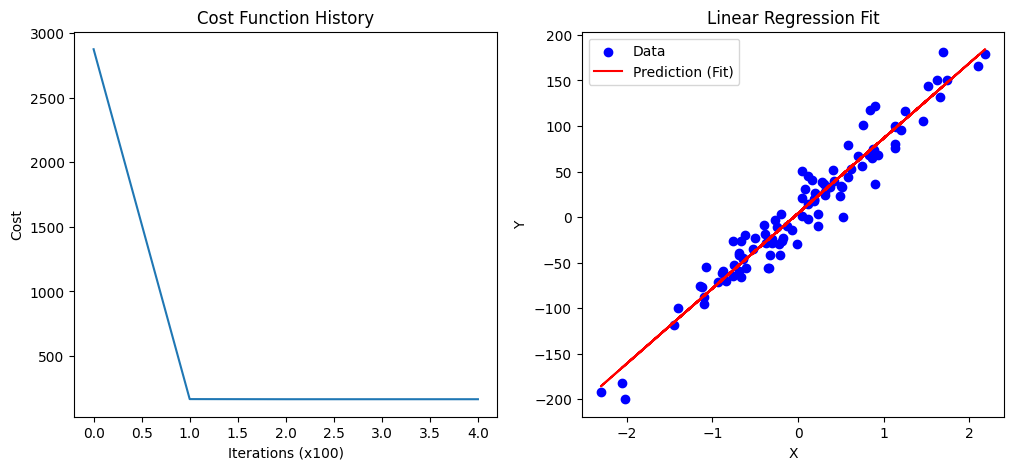

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# 1. 데이터 생성 (Data Generation)
m = 100 # 샘플 개수
X, Y = make_regression(n_samples=m, n_features=1, noise=20, random_state=1)

# [중요] 신경망 관례에 맞게 데이터 형태 변환 (features, samples)
# sklearn은 (m, 1)로 주지만, 보통 신경망 입력은 (1, m) 형태를 사용합니다.
X = X.T  # (1, m)
Y = Y.reshape(1, -1) # (1, m)

print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

# 2. 파라미터 초기화 (Initialization)
def initialize_parameters(dim):
    """
    w: (1, 1) 크기의 가중치 행렬 (dim, 1이 아님에 주의, 여기선 출력이 1개라 (1,dim))
    b: 스칼라 (또는 (1,1) 벡터)
    """
    w = np.random.randn(1, dim) * 0.01
    b = 0
    return w, b

# 3. 순전파 (Forward Propagation)
def forward_propagation(w, b, X):
    """
    선형 모델: Z = wX + b
    """
    Z = np.dot(w, X) + b
    return Z

# 4. 손실 함수 (Cost Function)
def compute_cost(Z, Y):
    """
    MSE (Mean Squared Error) 계산
    Cost = (1/2m) * sum((prediction - target)^2)
    """
    m = Y.shape[1]
    cost = (1 / (2 * m)) * np.sum(np.square(Z - Y))
    return cost

# 5. 역전파 (Backward Propagation) - 핵심 부분
def backward_propagation(Z, Y, X):
    """
    손실 함수의 기울기(Gradient)를 계산합니다.
    dZ: 손실 함수를 Z로 미분한 값
    dw: 손실 함수를 w로 미분한 값
    db: 손실 함수를 b로 미분한 값
    """
    m = Y.shape[1]

    # 편미분 연쇄 법칙(Chain Rule) 적용
    dZ = Z - Y  # (1, m)

    # dw = (1/m) * dZ @ X.T
    dw = (1 / m) * np.dot(dZ, X.T)

    # db = (1/m) * sum(dZ)
    db = (1 / m) * np.sum(dZ)

    return dw, db

# 6. 파라미터 업데이트 (Optimization)
def update_parameters(w, b, dw, db, learning_rate):
    """
    경사 하강법(Gradient Descent) 적용
    w = w - alpha * dw
    """
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

# === 전체 모델 통합 (Neural Network Model) ===
def nn_model(X, Y, num_iterations=1000, learning_rate=0.05, print_cost=False):

    # 파라미터 초기화
    w, b = initialize_parameters(X.shape[0])
    costs = [] # 비용 기록용

    # 학습 루프 (Training Loop)
    for i in range(num_iterations):

        # 1. 순전파
        Z = forward_propagation(w, b, X)

        # 2. 비용 계산
        cost = compute_cost(Z, Y)

        # 3. 역전파 (기울기 계산)
        dw, db = backward_propagation(Z, Y, X)

        # 4. 파라미터 업데이트
        w, b = update_parameters(w, b, dw, db, learning_rate)

        # 기록
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost}")

    return w, b, costs

# === 모델 실행 및 시각화 ===

# 모델 학습
w_final, b_final, costs = nn_model(X, Y, num_iterations=500, learning_rate=0.05, print_cost=True)

print(f"\n학습된 파라미터 -> w: {w_final[0][0]:.4f}, b: {b_final:.4f}")

# 결과 시각화
plt.figure(figsize=(12, 5))

# 1. 손실 함수 그래프
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.title("Cost Function History")
plt.xlabel("Iterations (x100)")
plt.ylabel("Cost")

# 2. 회귀선과 데이터 그래프
plt.subplot(1, 2, 2)
plt.scatter(X[0, :], Y[0, :], color='blue', label='Data') # 원본 데이터
predictions = forward_propagation(w_final, b_final, X) # 최종 예측
plt.plot(X[0, :], predictions[0, :], color='red', label='Prediction (Fit)') # 학습된 직선
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.show()

Not bad for such a small neural network with just a single perceptron and one input node!

<a name='3'></a>
## 3 - Multiple Linear Regression

![](https://i.sstatic.net/BmcZU.png)

<a name='3.1'></a>
### 3.1 - Multipe Linear Regression Model

Multiple linear regression model with two independent variables $x_1$, $x_2$ can be written as

$$\hat{y} = w_1x_1 + w_2x_2 + b = Wx + b,\tag{6}$$

where $Wx$ is the dot product of the input vector $x = \begin{bmatrix} x_1 & x_2\end{bmatrix}$ and parameters vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$, scalar parameter $b$ is the intercept.

The goal is the same - find the "best" parameters $w_1$, $w_2$ and $b$ such the differences between original values $y_i$ and predicted values $\hat{y}_i$ are minimum.

You can use a slightly more complicated neural network model to do that. Now matrix multiplication will be in the core of the model!

<a name='3.2'></a>
### 3.2 - Neural Network Model with a Single Perceptron and Two Input Nodes

Again, you will use only one perceptron, but with two input nodes shown in the following scheme:

The perceptron output calculation for every training example $x^{(i)} = \begin{bmatrix} x_1^{(i)} & x_2^{(i)}\end{bmatrix}$ can be written with dot product:

$$z^{(i)} = w_1x_1^{(i)} + w_2x_2^{(i)} + b = Wx^{(i)} + b,\tag{7}$$

where weights are in the vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$ and bias $b$ is a scalar. The output layer will have the same single node $\hat{y}^{(i)} = z^{(i)}$.

Organise all training examples in a matrix $X$ of a shape ($2 \times m$), putting $x_1^{(i)}$ and $x_2^{(i)}$ into columns. Then matrix multiplication of $W$ ($1 \times 2$) and $X$ ($2 \times m$) will give a ($1 \times m$) vector

$$WX =
\begin{bmatrix} w_1 & w_2\end{bmatrix}
\begin{bmatrix}
x_1^{(1)} & x_1^{(2)} & \dots & x_1^{(m)} \\
x_2^{(1)} & x_2^{(2)} & \dots & x_2^{(m)} \\ \end{bmatrix}
=\begin{bmatrix}
w_1x_1^{(1)} + w_2x_2^{(1)} &
w_1x_1^{(2)} + w_2x_2^{(2)} & \dots &
w_1x_1^{(m)} + w_2x_2^{(m)}\end{bmatrix}.$$

And the model can be written as

\begin{align}
Z &=  W X + b,\\
\hat{Y} &= Z,
\tag{8}\end{align}

where $b$ is broadcasted to the vector of a size ($1 \times m$). These are the calculations to perform in the forward propagation step. Cost function will remain the same, and there will be no change in methodology and training (that will be discussed in the next Course)!

<a name='3.3'></a>
### 3.3 - Dataset

Let's build a linear regression model for a Kaggle dataset [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques), saved in a file `data/house_prices_train.csv`. You will use two fields - ground living area (`GrLivArea`, square feet) and rates of the overall quality of material and finish (`OverallQual`, 1-10) to predict sales price (`SalePrice`, dollars).

To open the dataset you can use `pandas` function `read_csv`:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Mathematical Thinking/Mathematics-for-Machine-Learning/C1_Linear Algebra/w3/C1w3_graded_lab/data"
df = pd.read_csv(path + '/house_prices_train.csv')
df.shape

(1460, 81)

The data is now saved in the variable `df` as a **DataFrame**, which is the most commonly used `pandas` object. It is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it as a table or a spreadsheet. Full documentation can be found [here](https://pandas.pydata.org/).

Select the required fields and save them in the variables `X_raw`, `Y_raw`:

### 수치형 및 범주형 Feature를 사용하여 예측하는 실습

In [ ]:
# === 1. 데이터 추출 및 전처리 (Preprocessing) ===
X_raw = df[['GrLivArea', 'OverallQual', 'FullBath']].values
Y_raw = df['SalePrice'].values

X_train shape: (2, 1460) (특징 2개, 샘플 1460개)
Y_train shape: (1, 1460)
Cost after iteration 0: 0.480507
Cost after iteration 100: 0.142914
Cost after iteration 200: 0.142913
Cost after iteration 300: 0.142913
Cost after iteration 400: 0.142913
Cost after iteration 500: 0.142913
Cost after iteration 600: 0.142913
Cost after iteration 700: 0.142913
Cost after iteration 800: 0.142913
Cost after iteration 900: 0.142913
Cost after iteration 1000: 0.142913
Cost after iteration 1100: 0.142913
Cost after iteration 1200: 0.142913
Cost after iteration 1300: 0.142913
Cost after iteration 1400: 0.142913
Cost after iteration 1500: 0.142913
Cost after iteration 1600: 0.142913
Cost after iteration 1700: 0.142913
Cost after iteration 1800: 0.142913
Cost after iteration 1900: 0.142913

=== 학습 결과 ===
학습된 가중치 (Weights): [[0.36950628 0.57186163]]
학습된 편향 (Bias): 1.388843378202232e-16


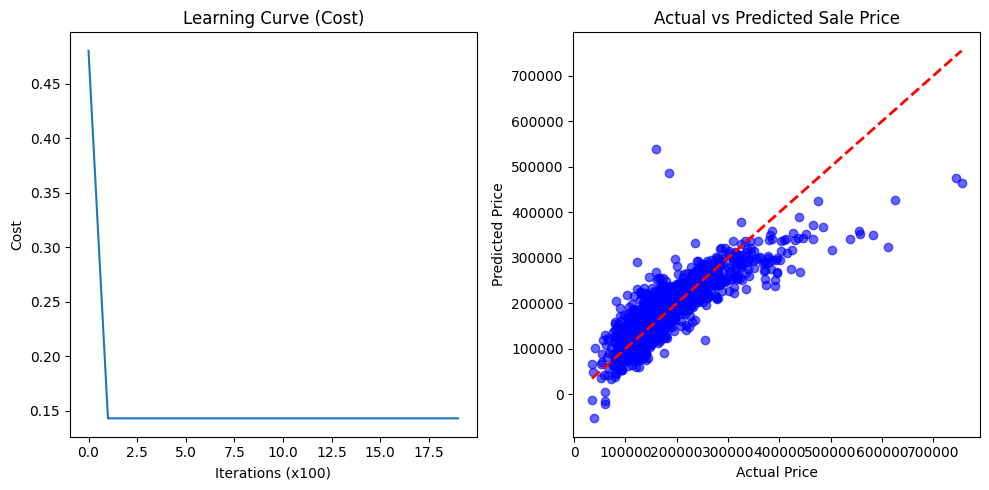

In [ ]:
# 다중 선형 회귀(Multiple Linear Regression)로 넘어가더라도 행렬 곱셈(Matrix Multiplication) 덕분에 신경망의 핵심 코드는 크게 변하지 않습니다.가장 큰 차이점은 데이터의 **형태(Shape)**와 **전처리(Scaling)**입니다.입력 차원: $X$가 (1, m)에서 (2, m)으로 바뀝니다. (특징이 2개이므로)가중치 차원: $W$가 (1, 1)에서 (1, 2)로 바뀝니다.데이터 스케일링: '면적(GrLivArea)'은 수천 단위이고 '품질(OverallQual)'은 1~10 단위입니다. 단위 차이가 크면 신경망이 학습을 거의 못 합니다. 따라서 정규화(Normalization)가 필수입니다.아래는 데이터를 전처리하고 다중 회귀를 수행하는 전체 코드입니다.다중 선형 회귀 신경망 코드Pythonimport numpy as np

# === 2. 데이터 전처리 (Preprocessing) ===

# Pandas 데이터프레임에서 추출
X_raw = df[['GrLivArea', 'OverallQual']].values
Y_raw = df['SalePrice'].values

# [중요] 정규화 (Normalization) - 경사 하강법을 위해 필수!
# (X - 평균) / 표준편차
X_mean = np.mean(X_raw, axis=0)
X_std = np.std(X_raw, axis=0)
X_norm = (X_raw - X_mean) / X_std

# Y값도 단위가 너무 크면(수억 단위) 학습이 불안정하므로 스케일링
Y_mean = np.mean(Y_raw)
Y_std = np.std(Y_raw)
Y_norm = (Y_raw - Y_mean) / Y_std

# [중요] 신경망 형태에 맞게 전치 (Features, Samples)
# X: (m, 2) -> (2, m)
# Y: (m,) -> (1, m)
X_train = X_norm.T
Y_train = Y_norm.reshape(1, -1)

print(f"X_train shape: {X_train.shape} (특징 2개, 샘플 {X_train.shape[1]}개)")
print(f"Y_train shape: {Y_train.shape}")

# === 3. 신경망 함수들 (단일 회귀와 100% 동일한 코드 사용!) ===
# 행렬 연산 덕분에 입력 개수가 늘어나도 코드를 수정할 필요가 없습니다.

def initialize_parameters(dim):
    # dim이 2이므로 W는 (1, 2) 크기로 생성됨
    w = np.random.randn(1, dim) * 0.01
    b = 0
    return w, b

def forward_propagation(w, b, X):
    # (1, 2) @ (2, m) -> (1, m) : 차원이 자동으로 맞춰짐
    Z = np.dot(w, X) + b
    return Z

def compute_cost(Z, Y):
    m = Y.shape[1]
    cost = (1 / (2 * m)) * np.sum(np.square(Z - Y))
    return cost

def backward_propagation(Z, Y, X):
    m = Y.shape[1]
    dZ = Z - Y
    dw = (1 / m) * np.dot(dZ, X.T) # dw는 (1, 2) 크기가 됨
    db = (1 / m) * np.sum(dZ)
    return dw, db

def update_parameters(w, b, dw, db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

def nn_model(X, Y, num_iterations=1000, learning_rate=0.01, print_cost=False):
    w, b = initialize_parameters(X.shape[0]) # 여기서 특징 수(2)가 들어감
    costs = []

    for i in range(num_iterations):
        Z = forward_propagation(w, b, X)
        cost = compute_cost(Z, Y)
        dw, db = backward_propagation(Z, Y, X)
        w, b = update_parameters(w, b, dw, db, learning_rate)

        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost:.6f}")

    return w, b, costs

# === 4. 학습 실행 ===

w_final, b_final, costs = nn_model(X_train, Y_train, num_iterations=2000, learning_rate=0.1, print_cost=True)

print("\n=== 학습 결과 ===")
print(f"학습된 가중치 (Weights): {w_final}")
print(f"학습된 편향 (Bias): {b_final}")

# === 5. 결과 확인 및 시각화 ===

# 예측값 계산 (정규화된 상태)
Z_pred_norm = forward_propagation(w_final, b_final, X_train)

# 원래 단위로 복원 (Inverse Transform)
Y_pred = (Z_pred_norm * Y_std) + Y_mean
Y_real = (Y_train * Y_std) + Y_mean

# 실제값 vs 예측값 비교 그래프
plt.figure(figsize=(10, 5))

# Cost 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.title("Learning Curve (Cost)")
plt.xlabel("Iterations (x100)")
plt.ylabel("Cost")

# 예측 vs 실제 산점도
plt.subplot(1, 2, 2)
plt.scatter(Y_real.flatten(), Y_pred.flatten(), color='blue', alpha=0.6)
plt.plot([Y_real.min(), Y_real.max()], [Y_real.min(), Y_real.max()], 'r--', lw=2) # 대각선(완벽한 예측)
plt.title("Actual vs Predicted Sale Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()


Congrats on finishing this programming assignment!